# Analisis de supervivencia de los reclamos de una empresa

 *primero veamos el problema a resolver* 

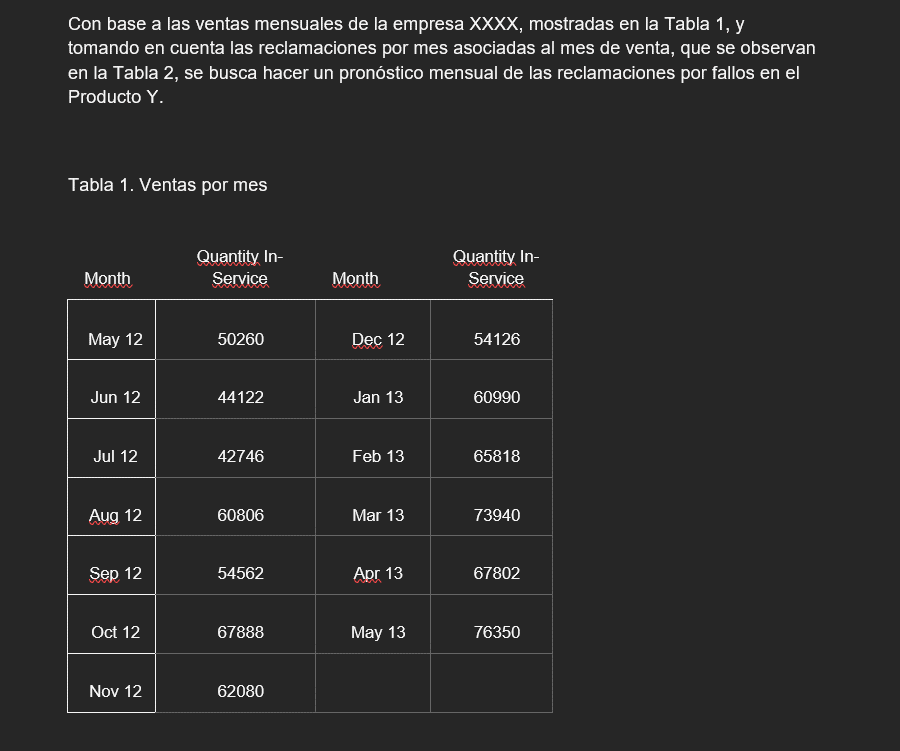

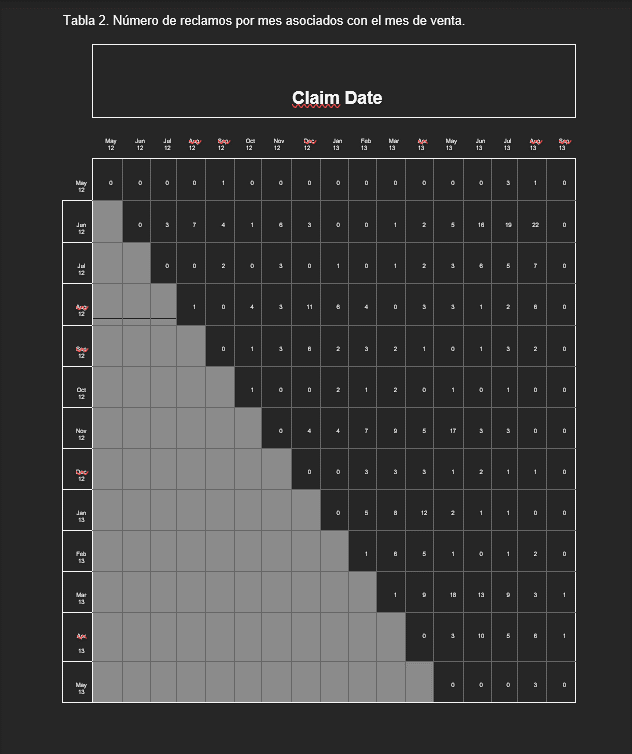

### *Una vez tenemos todo esto, lo que sigue es realizar nuestra base de datos donde tengamos un control de nuestros items y cargar las respectivas librerias que se usan en los analisis de supervivencia*

In [1]:
library(survival)


#Con "indices"en esta primera parte me refiero a T

indices <- rep(4,76347)
indices2 <- rep(5,67777)
indices3 <- rep(6,73886)
indices4 <- rep(7,65802)
indices5 <- rep(8,60961)
indices6 <- rep(9,54112)
indices7 <- rep(10,62028)
indices8 <- rep(11,67880)
indices9 <- rep(12,54538)
indices10 <- rep(13,60762)
indices11 <- rep(14,42716)
indices12 <- rep(15,44033)
indices13 <- rep(16,50255)
indicest=c(indices,indices2,indices3,indices4,indices5,indices6,indices7,indices8
           ,indices9,indices10,indices11,indices12,indices13)
nofallas <- rep(0,781097)

tiempo <- rep(0,4)
tiempo2 <- rep(1,31)
tiempo3 <- rep(2,64)
tiempo4 <- rep(3,59)
tiempo5<- rep(4,48)
tiempo6 <- rep(5,29)
tiempo7<- rep(6,33)
tiempo8 <- rep(7,6)
tiempo9<- rep(8,8)
tiempo10 <- rep(9,8)
tiempo11 <- rep(10,9)
tiempo12 <- rep(11,15)
tiempo13 <- rep(12,27)
tiempo14 <- rep(13,26)
tiempo15 <- rep(14,25)
tiempo16 <- rep(15,1)
tiempo17 <- rep(16,0)
fallas <- rep(1,393)

tiempot=c(tiempo,tiempo2,tiempo3,tiempo4,tiempo5,
          tiempo6,tiempo7,tiempo8,tiempo9,tiempo10,
          tiempo11,tiempo12,tiempo13,tiempo14,tiempo15,
          tiempo16,tiempo17)
status=c(nofallas,fallas)
tmf=c(indicest,tiempot)

#Mi data frame con el que trabajaremos el Kaplan-Meier
Datos <- data.frame(tmf,status)
totalfallas <- sum(Datos$status)
totalfallas#Sabemos de antemano que son 393

[1] 393

In [2]:
# Exportaremos el data frame por si acaso a excel (formato csv) :
# Ojo, hay que buscarlo en la carpeta de destino
write.csv(Datos, "misdatos.csv")

In [8]:
#Empezamos con lo de Kaplan Meier
s.obj <- Surv(Datos$tmf,Datos$status)# Objeto surv
km.g <- survfit(s.obj~1)#ninguna distincion
sort(s.obj)
summary(km.g)#Aqui nos dice los eventos y la estimacion del Kaplan-Meier aunque la visualizacion no sea la optima


    [1]  0   0   0   0   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
   [19]  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2 
   [37]  2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2 
   [55]  2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2 
   [73]  2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2 
   [91]  2   2   2   2   2   2   2   2   2   3   3   3   3   3   3   3   3   3 
  [109]  3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3 
  [127]  3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3 
  [145]  3   3   3   3   3   3   3   3   3   3   3   3   3   3   4   4   4   4 
  [163]  4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4 
  [181]  4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4 
  [199]  4   4   4   4   4   4   4   4   4+  4+  4+  4+  4+  4+  4+  4+  4+  4+
  [217]  4+  4+  4+  4+  4+  4+  4+  4+ 

Call: survfit(formula = s.obj ~ 1)

 time n.risk n.event survival  std.err lower 95% CI upper 95% CI
    0 781490       4    1.000 2.56e-06        1.000        1.000
    1 781486      31    1.000 7.57e-06        1.000        1.000
    2 781455      64    1.000 1.27e-05        1.000        1.000
    3 781391      59    1.000 1.61e-05        1.000        1.000
    4 781332      48    1.000 1.84e-05        1.000        1.000
    5 704937      29    1.000 1.99e-05        1.000        1.000
    6 637131      33    1.000 2.18e-05        1.000        1.000
    7 563212       6    1.000 2.23e-05        1.000        1.000
    8 497404       8    1.000 2.30e-05        1.000        1.000
    9 436435       8    1.000 2.39e-05        1.000        1.000
   10 382315       9    1.000 2.51e-05        1.000        1.000
   11 320278      15    1.000 2.79e-05        0.999        1.000
   12 252383      27    0.999 3.47e-05        0.999        0.999
   13 197818      26    0.999 4.32e-05        0.999   

### Podemos observar que tenemos una supervivencia del 99.9% por lo cual, los reclamos son bajos comparados con nuestras ventas

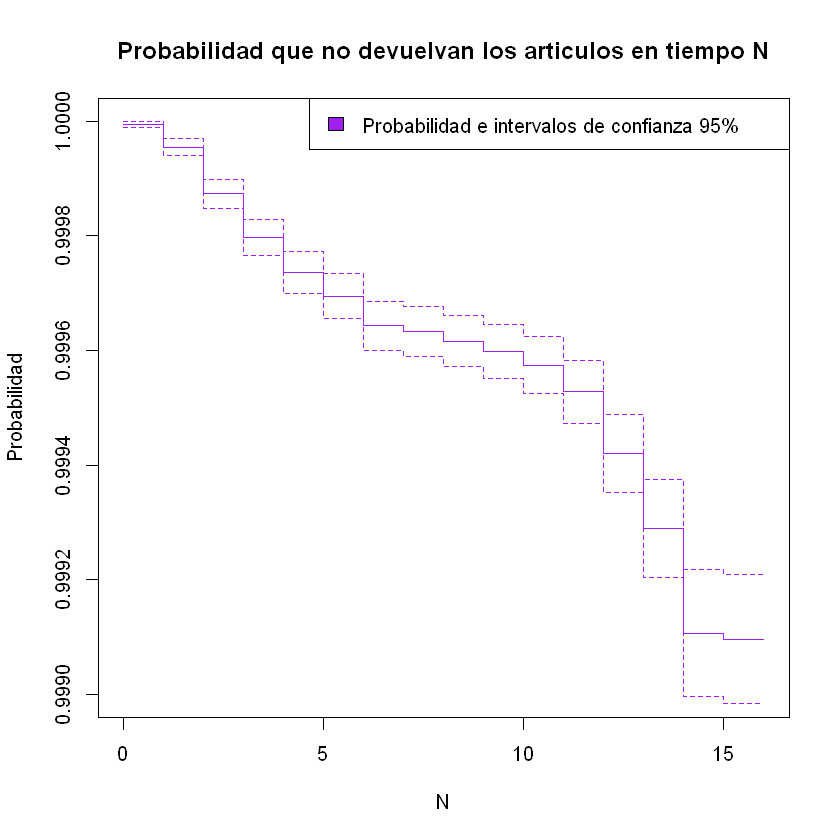

In [9]:
plot(km.g,ylim=c(.999,1),main='Probabilidad que no devuelvan los articulos en tiempo N',xlab='N',ylab='Probabilidad',
     col='purple')
legend(x = "topright", legend = c("Probabilidad e intervalos de confianza 95%"), 
       fill = c("purple"))

**Finalizamos mostrando la grafica con intervalos de confianza del 95%**